In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from math import pi
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import json
import ast


data = pd.read_csv('/Users/Mathi/Documents/GitHub/Visualisation-Task/movies.csv')

# HEATMAP OF CORRELATIONS BETWEEN KEY MOVIE FEATURES

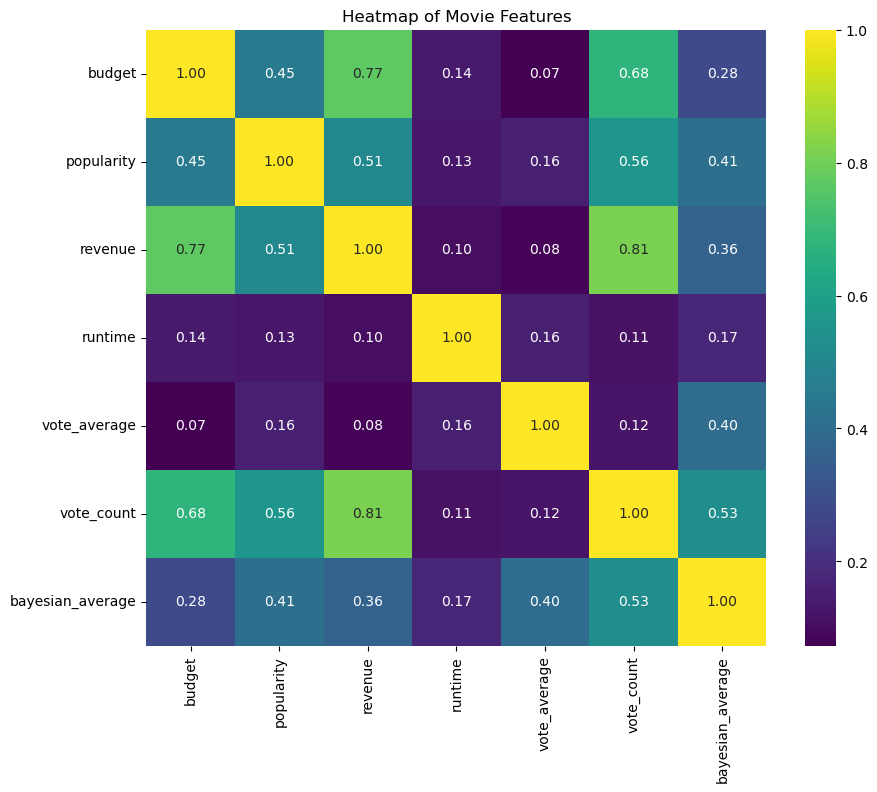

In [57]:
# Convert columns to numeric as required
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'bayesian_average']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap with the "viridis" colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Movie Features')
plt.show()

# HISTOGRAM OF MOVIE RUNTIME DISTRIBUTION

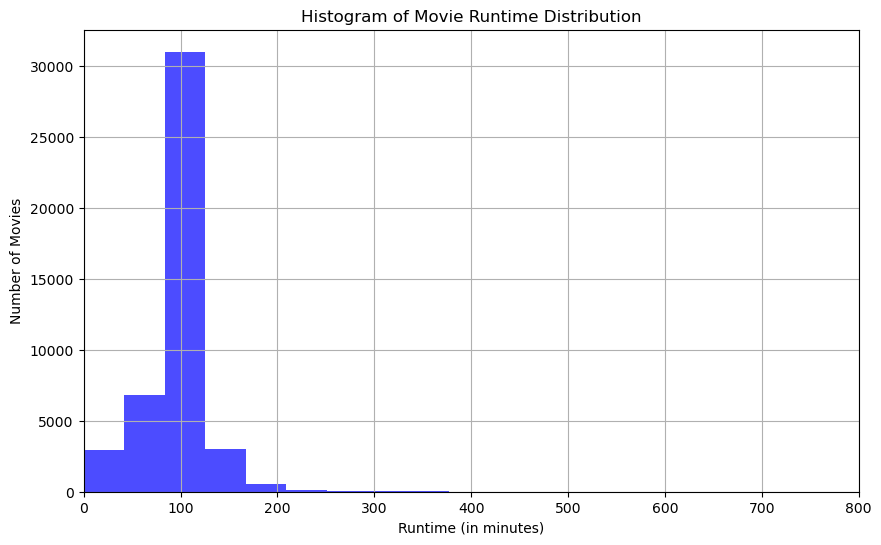

In [4]:
# Assume column names are corrected as in previous steps (header=1)
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')

# Drop rows where runtime is NaN
data = data.dropna(subset=['runtime'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['runtime'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Movie Runtime Distribution')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xlim(0, 800)
plt.show()

# BOX PLOT OF MOVIE VOTE AVERAGE DISTRIBUTION

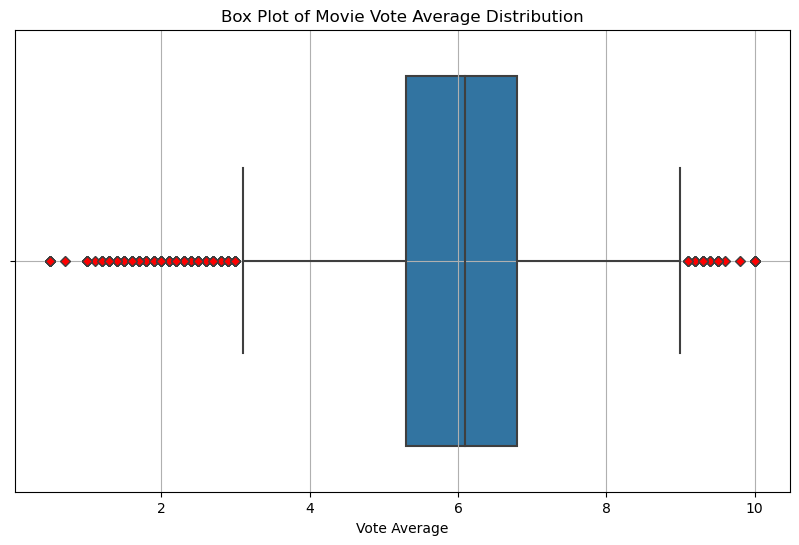

In [5]:
# Ensure the vote_average data is clean and numeric
data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')

# Removing entries where vote_average is zero or NaN as they are not useful for this analysis
data = data[data['vote_average'] > 0].dropna(subset=['vote_average'])

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['vote_average'], flierprops=dict(marker='D', markerfacecolor='red', markersize=5))
plt.title('Box Plot of Movie Vote Average Distribution')
plt.xlabel('Vote Average')
plt.grid(True)
plt.show()

# 3D SCATTER PLOT OF MOVIE BUDGET, REVENURE AND VOTE AVERAGE

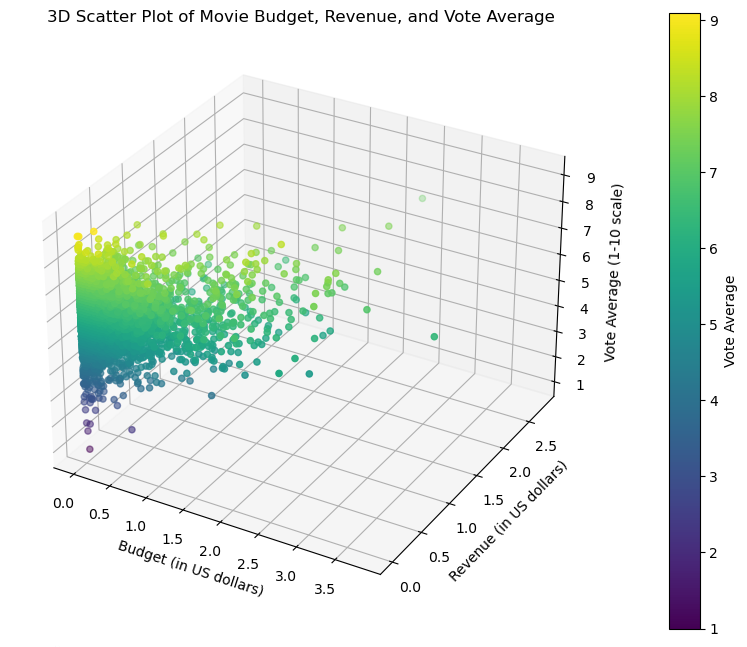

In [6]:
# Convert necessary columns to numeric and clean data
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')

# Filter out rows where any of these three columns have NaN or zero values (for budget or revenue)
filtered_data = data[(data['budget'] > 0) & (data['revenue'] > 0) & (data['vote_average'] > 0)]

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_data['budget'], filtered_data['revenue'], filtered_data['vote_average'], c=filtered_data['vote_average'], cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel('Budget (in US dollars)')
ax.set_ylabel('Revenue (in US dollars)')
ax.set_zlabel('Vote Average (1-10 scale)')
ax.set_title('3D Scatter Plot of Movie Budget, Revenue, and Vote Average')

# Color bar to show the vote average scale
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Vote Average')

plt.show()

# BUBBLE CHART OF MOVIE RUNTIME, REVENUE AND VOTE COUNT

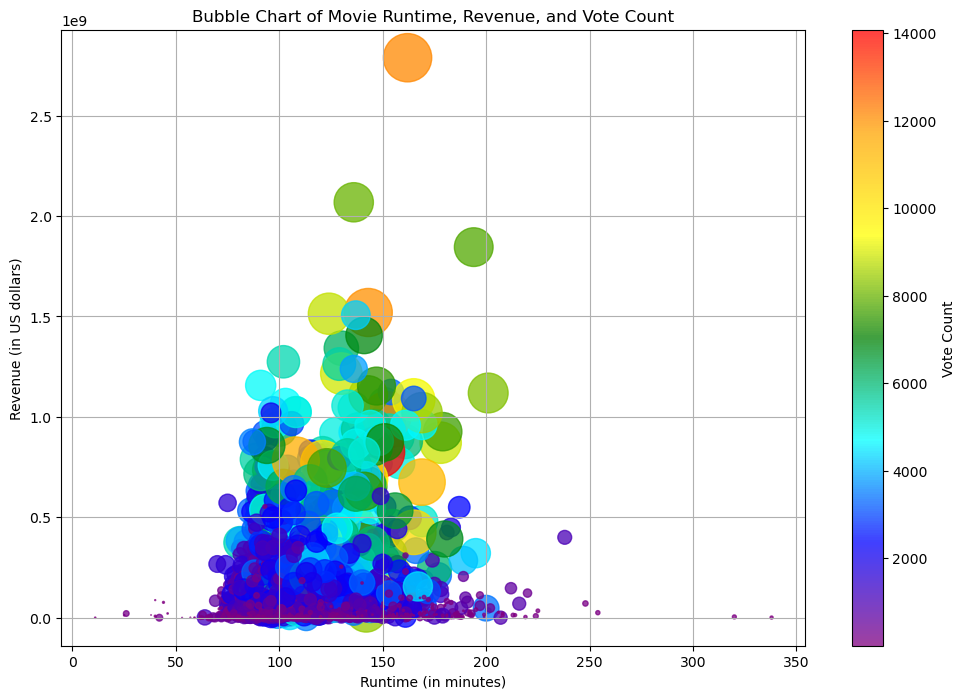

In [7]:
# Convert necessary columns to numeric and clean data
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['vote_count'] = pd.to_numeric(data['vote_count'], errors='coerce')

# Removing entries where any of these three columns have NaN or zero values
filtered_data = data[(data['runtime'] > 0) & (data['revenue'] > 0) & (data['vote_count'] > 0)]

# Define the custom colormap
cmap_colors = ['purple', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red']
cmap_name = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

# Creating the bubble chart with the custom colormap
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['runtime'], filtered_data['revenue'], s=filtered_data['vote_count']/10, c=filtered_data['vote_count'], cmap=cmap_name, alpha=0.75)
plt.title('Bubble Chart of Movie Runtime, Revenue, and Vote Count')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Revenue (in US dollars)')
plt.colorbar(label='Vote Count')
plt.grid(True)
plt.show()

# WORD CLOUD OF MOVIE LANGUAGES

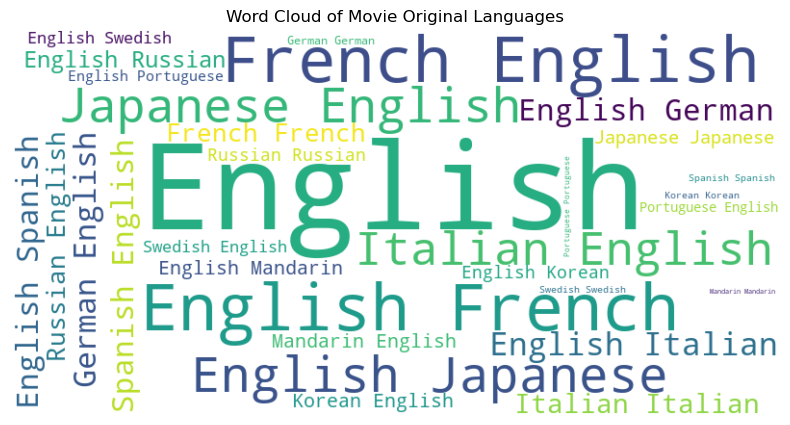

In [8]:
# Mapping language codes to full names based on common ISO language codes
language_mapping = {
    'en': 'English',
    'fr': 'French',
    'zh': 'Mandarin',
    'es': 'Spanish',
    'de': 'German',
    'it': 'Italian',
    'ja': 'Japanese',
    'ko': 'Korean',
    'ru': 'Russian',
    'pt': 'Portuguese',
    'sv': 'Swedish',  # Example of extending the mapping
    # Additional mappings can be added as required
}

# Apply mapping to each language code
data['language_full_name'] = data['original_language'].map(language_mapping).fillna('Other')

# Generate a text string for the word cloud
language_text_full = ' '.join(data['language_full_name'])

# Create the word cloud
wordcloud_full = WordCloud(width=800, height=400, background_color='white').generate(language_text_full)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Original Languages')
plt.show()

# AREA CHART OF MOVIE RELEASES OVER TIME AND REVENURE OVER TIME

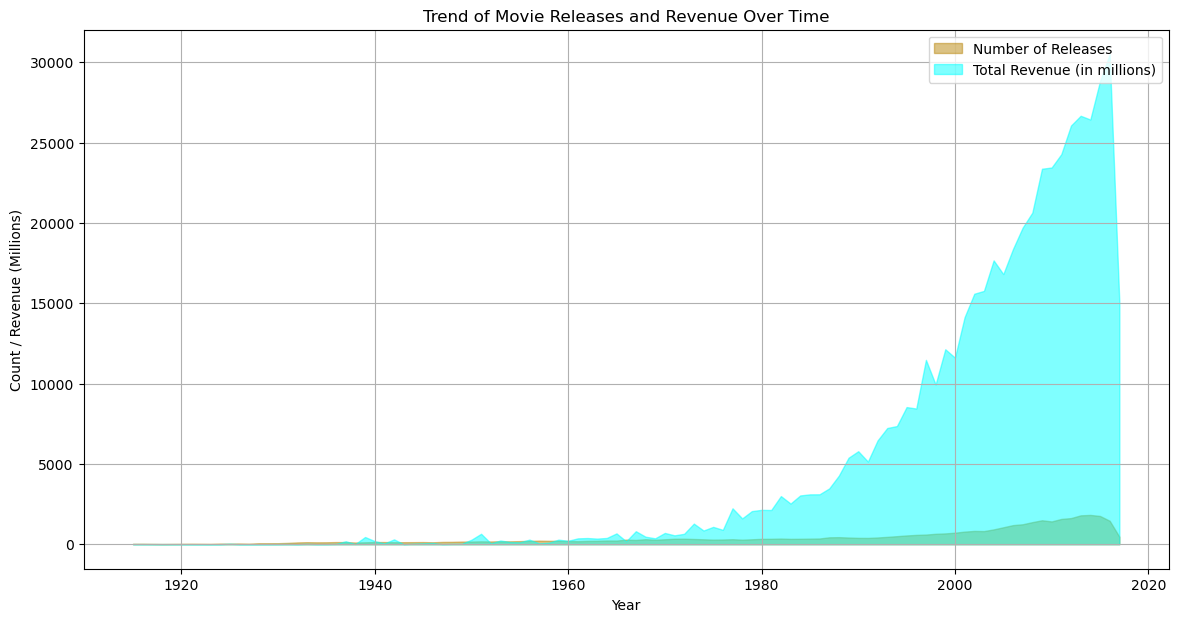

In [9]:
# Convert release_date to datetime and extract the year
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

# Convert revenue to numeric, handling non-numeric values and filling missing values with zero
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce').fillna(0)

# Group data by year and calculate number of releases and total revenue
annual_data = data.groupby('year').agg({'title': 'size', 'revenue': 'sum'}).rename(columns={'title': 'releases'})

# Filter out years with no data (if any)
annual_data = annual_data[(annual_data['releases'] > 0) & (annual_data['revenue'] > 0)]

# Creating the combined area chart
plt.figure(figsize=(14, 7))
plt.fill_between(annual_data.index, annual_data['releases'], color="darkgoldenrod", alpha=0.5, label='Number of Releases')
plt.fill_between(annual_data.index, annual_data['revenue']/1e6, color="cyan", alpha=0.5, label='Total Revenue (in millions)')
plt.title('Trend of Movie Releases and Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Count / Revenue (Millions)')
plt.legend()
plt.grid(True)
plt.show()

# CHOROPLETH MAP OF MOVIE REVENUE BY COUNTRY

In [10]:
# Remove extra characters and clean up country names
def clean_countries(country_list):
    # Use ast.literal_eval safely with a fallback
    try:
        countries = ast.literal_eval(country_list)  # Safely evaluate the string list
    except:
        countries = []  # In case of error, fallback to empty list
    cleaned_list = [country.replace("'", "").strip() for country in countries]
    return cleaned_list

data['country_list'] = data['country_list'].apply(clean_countries)

# Aggregate revenue by country
country_revenue = {}
for index, row in data.iterrows():
    for country in row['country_list']:
        if country in country_revenue:
            country_revenue[country] += row['revenue']
        else:
            country_revenue[country] = row['revenue']

country_revenue_df = pd.DataFrame(list(country_revenue.items()), columns=['Country', 'Total_Revenue'])

# Generate choropleth map
fig = px.choropleth(country_revenue_df,
                    locations="Country",
                    locationmode='country names',
                    color="Total_Revenue",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Movie Revenue by Country")
fig.show()

# LINE GRAPH OF MOVIE RELEASE COUNTS OVER TIME BY GENRE

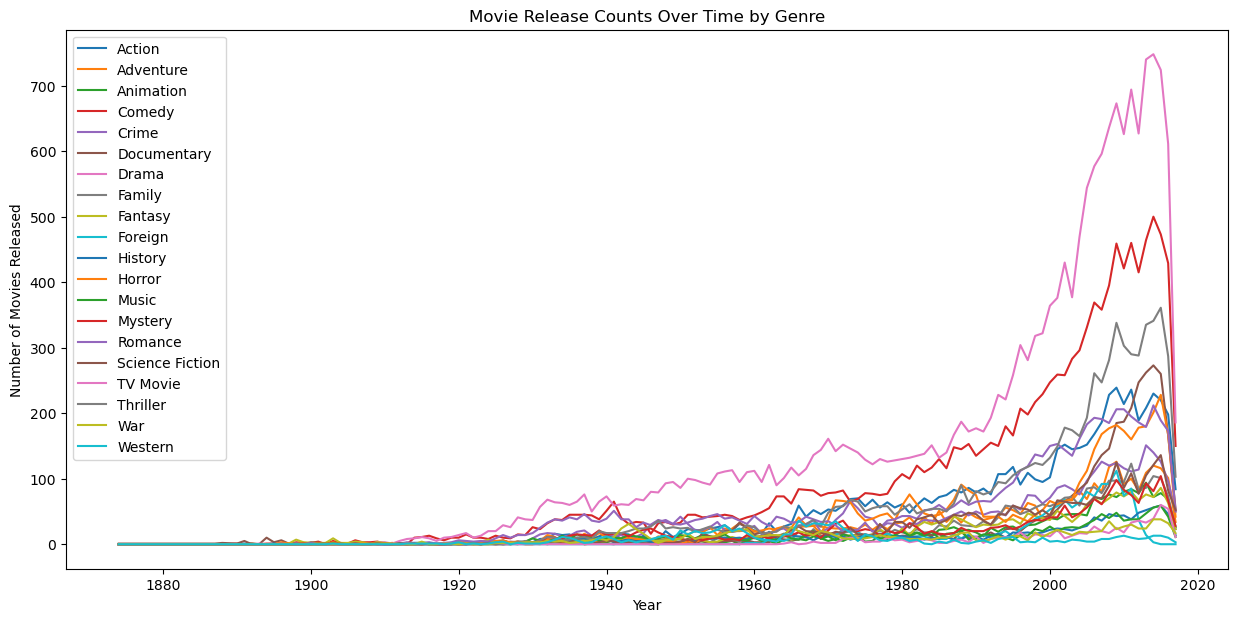

In [11]:
# Convert release_date to datetime and extract the year
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

# Clean the genre_list to a list of genres
data['genre_list'] = data['genre_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Aggregate the data
genre_counts = data.explode('genre_list').groupby(['year', 'genre_list']).size().reset_index(name='count')

# Pivot the data for the line plot
genre_counts_pivot = genre_counts.pivot(index='year', columns='genre_list', values='count').fillna(0)

# Plotting
plt.figure(figsize=(15, 7))
for genre in genre_counts_pivot.columns:
    plt.plot(genre_counts_pivot.index, genre_counts_pivot[genre], label=genre)
plt.title('Movie Release Counts Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend()
plt.show()

# STACKED BAR CHART OF AVG POPULARITY AND AVG VOTE BY TOP 20 DIRECTORS

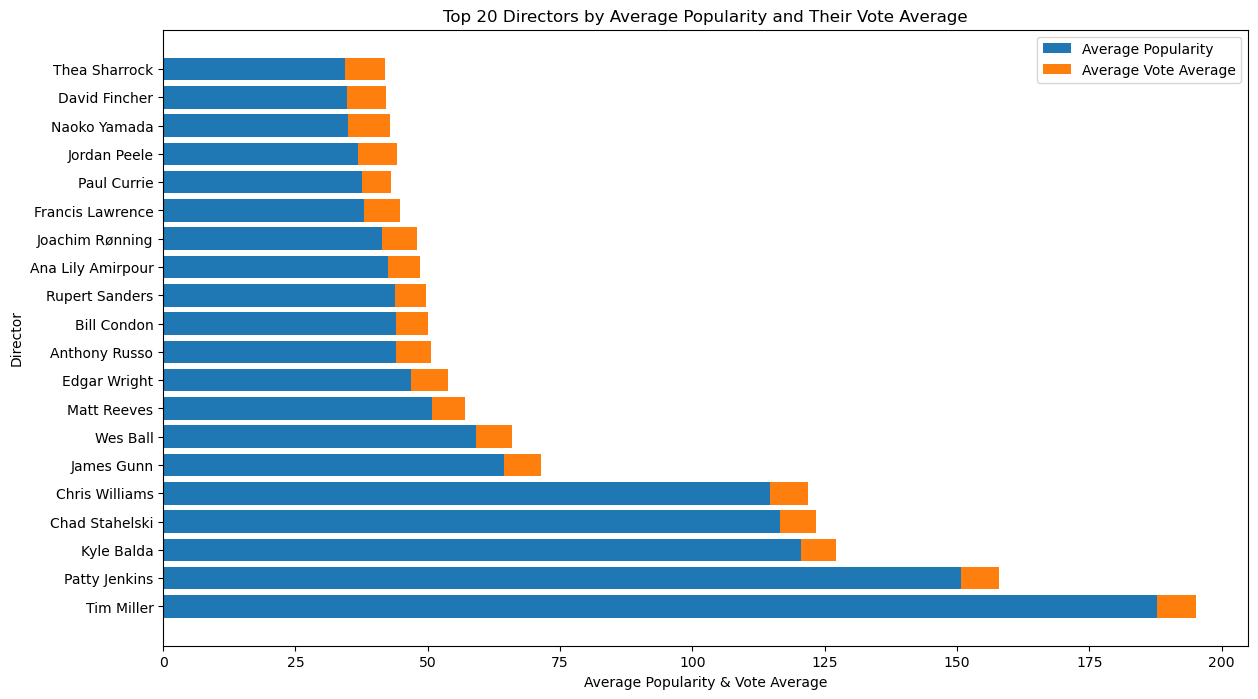

In [12]:
# Process director names and calculate averages
data['job_name_pairs'] = data['job_name_pairs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])
data['director'] = data['job_name_pairs'].apply(lambda pairs: [name for job, name in pairs if job == 'Director'])
data['director'] = data['director'].apply(lambda x: x[0] if x else None)
filtered_data = data.dropna(subset=['director', 'popularity', 'vote_average'])
director_popularity_stats = filtered_data.groupby('director').agg({'popularity':'mean', 'vote_average':'mean', 'title':'count'}).reset_index()
top_directors_by_popularity = director_popularity_stats.nlargest(20, 'popularity')

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(top_directors_by_popularity['director'], top_directors_by_popularity['popularity'], label='Average Popularity')
ax.barh(top_directors_by_popularity['director'], top_directors_by_popularity['vote_average'], left=top_directors_by_popularity['popularity'], label='Average Vote Average')
ax.set_xlabel('Average Popularity & Vote Average')
ax.set_ylabel('Director')
ax.set_title('Top 20 Directors by Average Popularity and Their Vote Average')
ax.legend()
plt.show()

# HISTOGRAM OF BAYESIAN AVG SCORES

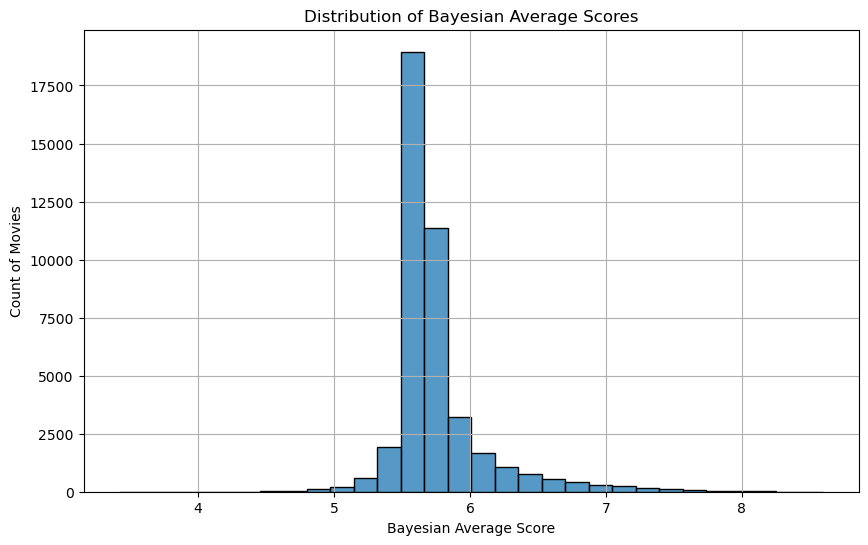

In [13]:
# Ensure 'bayesian_average' is a float and drop NaN values
data['bayesian_average'] = pd.to_numeric(data['bayesian_average'], errors='coerce')
filtered_data = data.dropna(subset=['bayesian_average'])

# Plotting the histogram of Bayesian average scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['bayesian_average'], bins=30, kde=False)
plt.title('Distribution of Bayesian Average Scores')
plt.xlabel('Bayesian Average Score')
plt.ylabel('Count of Movies')
plt.grid(True)
plt.show()


# SCATTERPLOT OF BAYESIAN AVG SCORES VS VOTE AVG

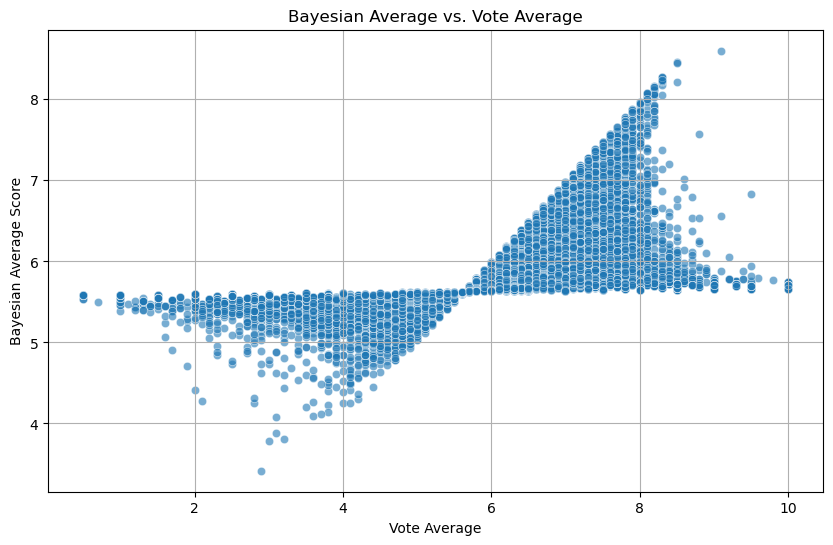

In [14]:
# Convert columns to numeric and drop NaNs
data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
data['bayesian_average'] = pd.to_numeric(data['bayesian_average'], errors='coerce')
filtered_data = data.dropna(subset=['vote_average', 'bayesian_average'])

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='vote_average', y='bayesian_average', alpha=0.6)
plt.title('Bayesian Average vs. Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Bayesian Average Score')
plt.grid(True)
plt.show()

# RADAR CHART FOR MOVIE GENRES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


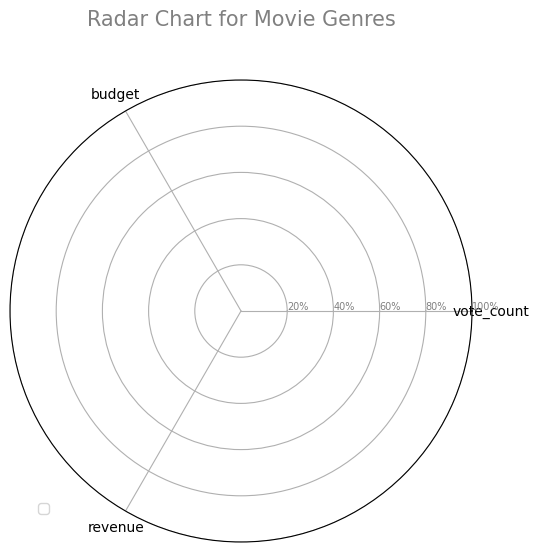

In [25]:
# Preprocess and calculate average values per genre
data['genre_list'] = data['genre_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['vote_count'] = pd.to_numeric(data['vote_count'], errors='coerce')
genre_metrics = data.explode('genre_list').groupby('genre_list').agg({
    'vote_count': 'mean',
    'budget': 'mean',
    'revenue': 'mean'
}).reset_index()

# Normalize the metrics for radar chart comparison
for col in ['vote_count', 'budget', 'revenue']:
    max_value = genre_metrics[col].max()
    genre_metrics[col] = genre_metrics[col] / max_value

# Radar chart setup and plot
num_vars = len(genre_metrics.columns) - 1
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
genre_metrics = pd.concat([genre_metrics, genre_metrics.iloc[0:1]])
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
labels = genre_metrics.columns[1:]
plt.xticks(angles[:-1], labels)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=7)
plt.ylim(0, 1)

# Plot data
for idx in range(len(genre_metrics) - 1):
    row = genre_metrics.iloc[idx].drop('genre_list').tolist()
    row += row[:1]
    ax.plot(angles, row, label=genre_metrics.iloc[idx]['genre_list'], linewidth=2)
    ax.fill(angles, row, alpha=0.1)

plt.title('Radar Chart for Movie Genres', size=15, color='grey', y=1.1)
plt.legend(loc='lower right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# SANKEY DIAGRAM OF GENRE TO TOTAL REVENUE

In [29]:
# Explode the genre_list if it's in list format stored as strings
data['genre_list'] = data['genre_list'].apply(eval)  # ensure this is safe or already in correct format
data = data.explode('genre_list')

# Aggregate revenue by genre
genre_revenue = data.groupby('genre_list')['revenue'].sum().reset_index()

# Lists for the sources, targets, and values for the Sankey diagram
source = [i for i in range(len(genre_revenue))]  # indices of genres
target = [len(genre_revenue)] * len(genre_revenue)  # Single target for all flows
value = genre_revenue['revenue'].tolist()  # Revenue values
labels = genre_revenue['genre_list'].tolist() + ['Total Revenue']  # All genre labels and one 'Total Revenue'

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,  # Source indices
        target=target,  # Target index
        value=value  # Revenue values
    )
)])

fig.update_layout(title_text='Sankey Diagram of Genre to Revenue', font_size=10)
fig.show()

TypeError: eval() arg 1 must be a string, bytes or code object

# VIOLIN PLOT OF REVENUES BY TOP DIRECTORS

In [36]:
# Filter directors from job_name_pairs
data['job_name_pairs'] = data['job_name_pairs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])
data['director'] = data['job_name_pairs'].apply(lambda pairs: [name for job, name in pairs if job == 'Director'])
data['director'] = data['director'].apply(lambda x: x[0] if x else None)
filtered_data = data.dropna(subset=['director'])

# First, calculate the total revenue for each director and identify the top directors
director_revenue = filtered_data.groupby('director')['revenue'].sum().sort_values(ascending=False).head(20).index

# Now filter the data to include only the top directors
top_directors_data = filtered_data[filtered_data['director'].isin(director_revenue)]

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(top_directors_data['director'].unique()))

# Create violin plots for the top directors
plt.figure(figsize=(14, 8))
violin_plot = sns.violinplot(data=top_directors_data, x='director', y='revenue', scale='width', inner='quartile', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Violin Plot of Revenues by Top Directors')
plt.xlabel('Director')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1400x800 with 0 Axes>